[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1B6ieIDyRnky5D9OcYyfPDMnfq4SJoXml?authuser=1#scrollTo=uz82cIOWGu0V)

## Exploratory Data Analysis (EDA)


Realizaremos el analisis exploratorio para la base de datos ´Bodyfat´

In [ ]:
!pip install openml

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.5/144.5 kB 1.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.2/93.2 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 16.9 MB/s eta 0:00:00
  Created wheel for openml: filename=openml-0.14.2-py3-none-any.whl size=158699 sha256=af2b42c9305ddd9b4111d1572999eb48c607d6c127e3c3aea54c59861da22e27
  Stored in directory: /root/.cache/pip/wheels/2e/4e/af/5e721761d86375dbca82e63cc2470019e97815bc39f11451ea
  Created wheel for liac-arff: filename=liac_arff-2.5.0-py3-none-any.whl size=11716 sha256=e7758e41dfbd346bdaed89666f42df4eccf3e28b025769d44a77e08d4773b2f0
  Stored in directory: /root/.cache/pip/wheels/5d/2a/9c/3895d9617f8f49a0883ba686326d598e78a1c2f54fe3cae86d
Successfully built

In [ ]:
import numpy as np
import pandas as pd
from scipy.io import arff
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.io import arff
import openml
import scipy.stats as stats
from openml.datasets import edit_dataset, fork_dataset, get_dataset

Importamos la librería y cargamos los datos


In [ ]:
dataset = openml.datasets.get_dataset(560)

<ipython-input-4-343d085db803>:1: FutureWarning: Starting from Version 0.15 `download_data`, `download_qualities`, and `download_features_meta_data` will all be ``False`` instead of ``True`` by default to enable lazy loading. To disable this message until version 0.15 explicitly set `download_data`, `download_qualities`, and `download_features_meta_data` to a bool while calling `get_dataset`.
  dataset = openml.datasets.get_dataset(560)


In [ ]:
# Obtener los datos como un DataFrame de Pandas
df_body, df_target, categorical_indicator, attribute_names = dataset.get_data(
    dataset_format='dataframe',
    target=dataset.default_target_attribute
)

In [ ]:
df_body.shape

(252, 14)

In [ ]:
df_body.head(10)

,Density,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7
5,1.0502,24,210.25,74.75,39.0,104.5,94.4,107.8,66.0,42.0,25.6,35.7,30.6,18.8
6,1.0549,26,181.00,69.75,36.4,105.1,90.7,100.3,58.4,38.3,22.9,31.9,27.8,17.7
7,1.0704,25,176.00,72.50,37.8,99.6,88.5,97.1,60.0,39.4,23.2,30.5,29.0,18.8
8,1.0900,25,191.00,74.00,38.1,100.9,82.5,99.9,62.9,38.3,23.8,35.9,31.1,18.2
9,1.0722,23,198.25,73.50,42.1,99.6,88.6,104.1,63.1,41.7,25.0,35.6,30.0,19.2


In [ ]:
df_body.dtypes

Density    float64
Age          uint8
Weight     float64
Height     float64
Neck       float64
Chest      float64
Abdomen    float64
Hip        float64
Thigh      float64
Knee       float64
Ankle      float64
Biceps     float64
Forearm    float64
Wrist      float64
dtype: object

Como podemos observar, no hay necesidad de eliminar columnas debido a que todas son relevantes o utiles para predecir nuestra variable respuesta

In [ ]:
if df_body.isnull().any().any():
    print("Hay datos nulos en el DataFrame.")
else:
    print("No hay datos nulos en el DataFrame.")

No hay datos nulos en el DataFrame.


In [ ]:
duplicados = df_body.duplicated()

# Mostrar las filas duplicadas
print("Filas duplicadas:")
print(df_body[duplicados])

Filas duplicadas:
Empty DataFrame
Columns: [Density, Age, Weight, Height, Neck, Chest, Abdomen, Hip, Thigh, Knee, Ankle, Biceps, Forearm, Wrist]
Index: []


No contamos con columnas duplicadas ni datos nulos en nuestro dataset


In [ ]:
df_body.describe()

,Density,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
count,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,1.055574,44.884921,178.924405,70.148810,37.992063,100.824206,92.555952,99.904762,59.405952,38.590476,23.102381,32.273413,28.663889,18.229762
std,0.019031,12.602040,29.389160,3.662856,2.430913,8.430476,10.783077,7.164058,5.249952,2.411805,1.694893,3.021274,2.020691,0.933585
min,0.995000,22.000000,118.500000,29.500000,31.100000,79.300000,69.400000,85.000000,47.200000,33.000000,19.100000,24.800000,21.000000,15.800000
25%,1.041400,35.750000,159.000000,68.250000,36.400000,94.350000,84.575000,95.500000,56.000000,36.975000,22.000000,30.200000,27.300000,17.600000
50%,1.054900,43.000000,176.500000,70.000000,38.000000,99.650000,90.950000,99.300000,59.000000,38.500000,22.800000,32.050000,28.700000,18.300000
75%,1.070400,54.000000,197.000000,72.250000,39.425000,105.375000,99.325000,103.525000,62.350000,39.925000,24.000000,34.325000,30.000000,18.800000
max,1.108900,81.000000,363.150000,77.750000,51.200000,136.200000,148.100000,147.700000,87.300000,49.100000,33.900000,45.000000,34.900000,21.400000


#Analisis de datos atípicos

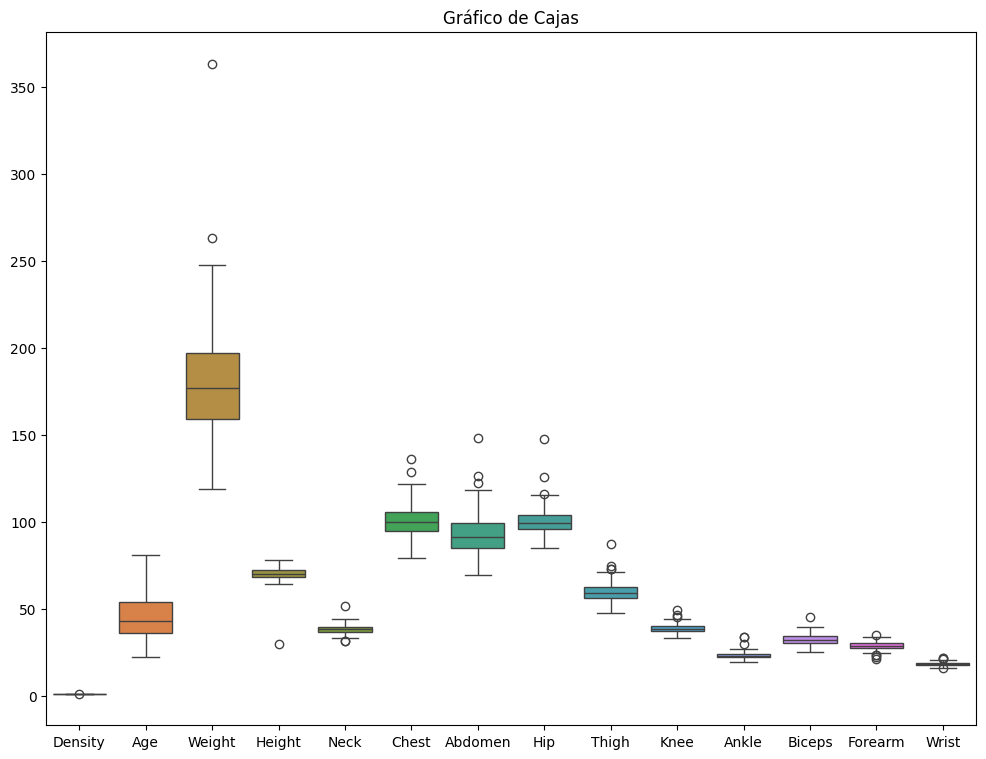

In [ ]:
plt.figure(figsize=(12,9))

sns.boxplot(data=df_body)
plt.title('Gráfico de Cajas')
plt.show()

In [ ]:
Q1 = df_body.quantile(0.25)
Q3 = df_body.quantile(0.75)
IQR = Q3 - Q1
cantidad_atipicos = 0

# Encuentra los valores atípicos y sus posiciones
outliers = {}
for col in df_body.columns:
    outlier_mask = (df_body[col] < (Q1[col] - 1.5 * IQR[col])) | (df_body[col] > (Q3[col] + 1.5 * IQR[col]))
    outliers[col] = df_body[col][outlier_mask]

# Imprime los valores atípicos y sus posiciones
for col, values in outliers.items():
    if not values.empty:
        print(f"Valores atípicos en la columna '{col}':")
        for index, value in values.items():
            print(f"Posición: {index}, Valor: {value}")
            cantidad_atipicos += 1
print(f"Cantidad de datos atipicos: '{cantidad_atipicos}'")

Valores atípicos en la columna 'Density':
Posición: 215, Valor: 0.995
Valores atípicos en la columna 'Weight':
Posición: 38, Valor: 363.15
Posición: 40, Valor: 262.75
Valores atípicos en la columna 'Height':
Posición: 41, Valor: 29.5
Valores atípicos en la columna 'Neck':
Posición: 38, Valor: 51.2
Posición: 44, Valor: 31.5
Posición: 105, Valor: 31.1
Valores atípicos en la columna 'Chest':
Posición: 38, Valor: 136.2
Posición: 40, Valor: 128.3
Valores atípicos en la columna 'Abdomen':
Posición: 38, Valor: 148.1
Posición: 40, Valor: 126.2
Posición: 215, Valor: 122.1
Valores atípicos en la columna 'Hip':
Posición: 34, Valor: 116.1
Posición: 38, Valor: 147.7
Posición: 40, Valor: 125.6
Valores atípicos en la columna 'Thigh':
Posición: 38, Valor: 87.3
Posición: 40, Valor: 72.5
Posición: 151, Valor: 72.9
Posición: 168, Valor: 74.4
Valores atípicos en la columna 'Knee':
Posición: 38, Valor: 49.1
Posición: 191, Valor: 45.0
Posición: 243, Valor: 46.0
Valores atípicos en la columna 'Ankle':
Posici

#¿Que hacemos con los atípicos?

Como podemos observar, contamos con un total de 35 datos atípicos que al ser analizados uno por uno, llegamos a la conclusión que no son datos fuera de la realidad o que se deriven de errores en su recopilación, de hecho, es importante reconocer su valor ya que nos proporcionan fuentes de información únicas que pueden ayudar a mejorar la calidad y robustez de los modelos resultantes. Por lo tanto no serán removidos del dataset original.

#Correlación entre variables

In [ ]:
correlation_matriz = df_body.corr()
correlation_matriz

,Density,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
Density,1.000000,-0.277637,-0.594062,0.097881,-0.472966,-0.682599,-0.798955,-0.609331,-0.553091,-0.495040,-0.264890,-0.487109,-0.351648,-0.325716
Age,-0.277637,1.000000,-0.012746,-0.171645,0.113505,0.176450,0.230409,-0.050332,-0.200096,0.017516,-0.105058,-0.041162,-0.085056,0.213531
Weight,-0.594062,-0.012746,1.000000,0.308279,0.830716,0.894191,0.887995,0.940884,0.868694,0.853167,0.613685,0.800416,0.630301,0.729775
Height,0.097881,-0.171645,0.308279,1.000000,0.253710,0.134892,0.087813,0.170394,0.148436,0.286053,0.264744,0.207816,0.228649,0.322065
Neck,-0.472966,0.113505,0.830716,0.253710,1.000000,0.784835,0.754077,0.734958,0.695697,0.672405,0.477892,0.731146,0.623660,0.744826
Chest,-0.682599,0.176450,0.894191,0.134892,0.784835,1.000000,0.915828,0.829420,0.729859,0.719496,0.482988,0.727907,0.580173,0.660162
Abdomen,-0.798955,0.230409,0.887995,0.087813,0.754077,0.915828,1.000000,0.874066,0.766624,0.737179,0.453223,0.684983,0.503316,0.619832
Hip,-0.609331,-0.050332,0.940884,0.170394,0.734958,0.829420,0.874066,1.000000,0.896410,0.823473,0.558387,0.739273,0.545014,0.630090
Thigh,-0.553091,-0.200096,0.868694,0.148436,0.695697,0.729859,0.766624,0.896410,1.000000,0.799170,0.539797,0.761477,0.566842,0.558685
Knee,-0.495040,0.017516,0.853167,0.286053,0.672405,0.719496,0.737179,0.823473,0.799170,1.000000,0.611608,0.678709,0.555898,0.664507


In [ ]:
highest_correlations = correlation_matriz.abs().unstack().sort_values(ascending=False)
highest_correlations = highest_correlations[highest_correlations != 1]
highest_correlations

Weight   Hip        0.940884
Hip      Weight     0.940884
Chest    Abdomen    0.915828
Abdomen  Chest      0.915828
Thigh    Hip        0.896410
                      ...   
Biceps   Age        0.041162
Age      Knee       0.017516
Knee     Age        0.017516
Weight   Age        0.012746
Age      Weight     0.012746
Length: 182, dtype: float64

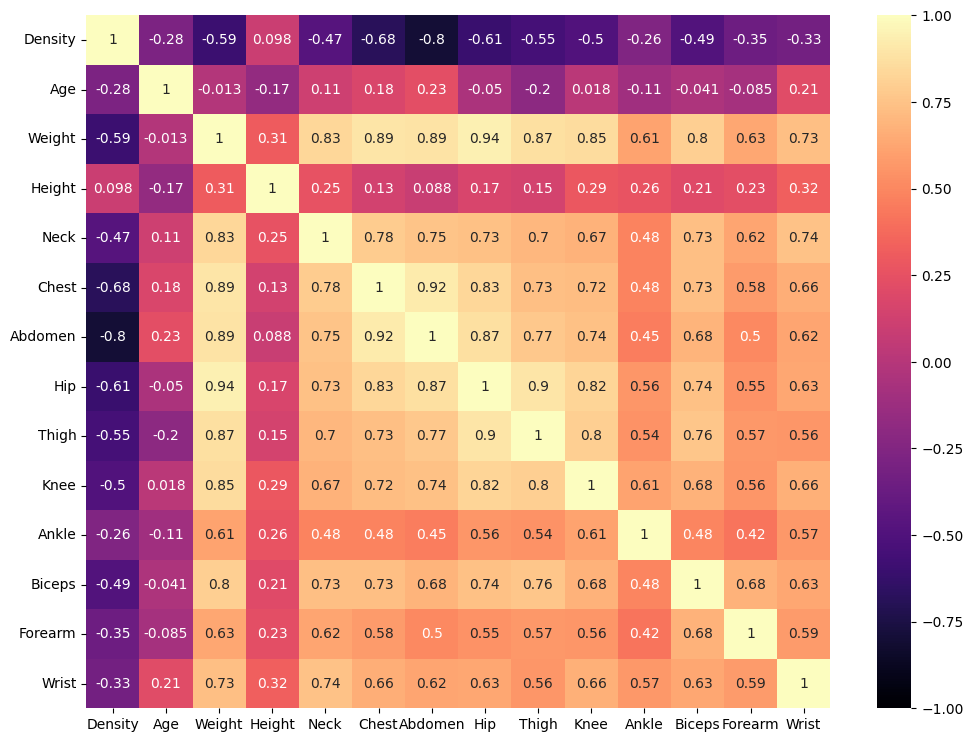

In [ ]:
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(correlation_matriz, vmin=-1, vmax=1, cmap='magma', annot=True);

Como se puede observar, hay una correlación muy alta entre las variables 'Weight', 'Hip', 'Chest', 'Abdomen', 'Thigh'. Esto tiene sentido ya que al tratar de predecir el porcentaje de grasa, las partes del cuerpo que más volumen tienden a adquirir cuando se aumenta de peso son precisamente las que cuentan con mayor volumen inicial.

En conclusión la variable con mayor influencia o peso en general es 'Weight' y las variables con menor influencia y correlación con las demas son 'Age' y 'Density', sin embargo, no es información suficiente para eliminarlas del conjunto, ya que pueden contener información relevante para predecir la variable objetivo que no logran capturar las otras caracteristicas.

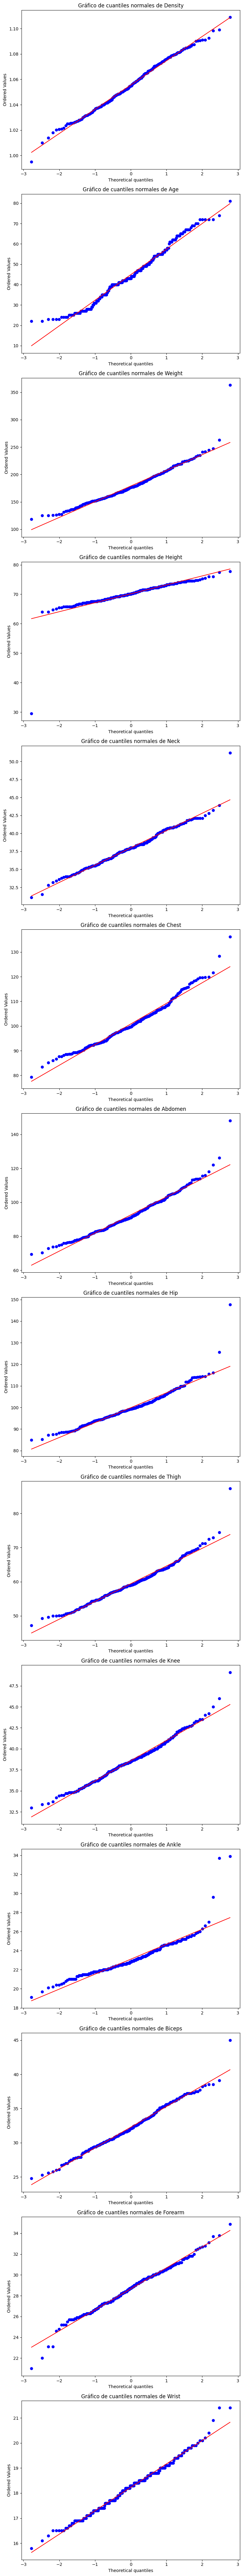

In [ ]:
fig, axes = plt.subplots(nrows=len(df_body.columns), ncols=1, figsize=(8, 6*len(df_body.columns)))

for i, col in enumerate(df_body.columns):
    stats.probplot(df_body[col], dist="norm", plot=axes[i])
    axes[i].set_title(f'Gráfico de cuantiles normales de {col}')

plt.tight_layout()
plt.show()


#Interpretación de la distribución de las variables

Dados los gráficos anteriores podemos observar que todos los datos de las variables cuentan con una distribución normal, o sea tienen a seguir una distribución gaussiana.

Esto puede ser bastante beneficioso a la hora de interpretar, realizar inferencia estadística (intervalos de confianza y pruebas de hipótesis), simplicidad en los modelos, etc.

En resumen, la normalidad de los datos ofrece beneficios que van desde una interpretación más sencilla de los resultados hasta una mayor precisión en los métodos estadísticos aplicados.

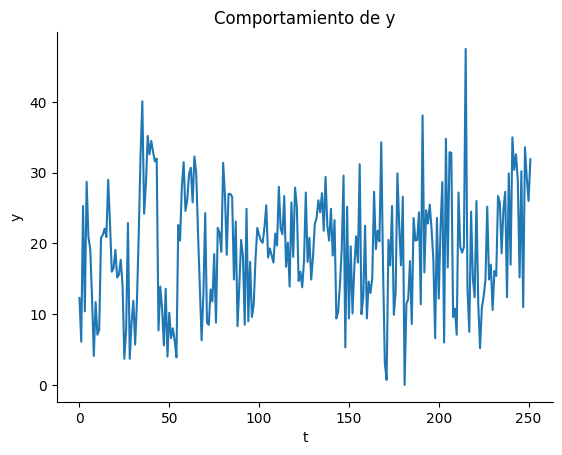

In [ ]:
t = np.arange(0, len(df_target), 1)
fig, ax = plt.subplots()
plt.plot(t,df_target)
plt.xlabel('t')
plt.ylabel('y')
plt.title('Comportamiento de y')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

Text(0, 0.5, 'frecuencia')

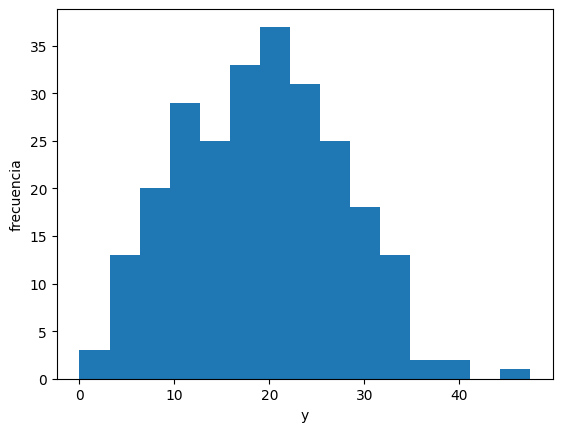

In [ ]:
n, bins, patches = plt.hist(df_target, bins = 15)
plt.xlabel('y')
plt.ylabel('frecuencia')